In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [29]:
def load_tab_separated_data(filepath):
    with open(filepath, 'r') as f:
        data = [line.strip().split('\t') for line in f if line.strip()]
    data = np.array(data, dtype=float)
    return data

# Ejemplo de uso:
# data = load_tab_separated_data(gyration_file)

In [ ]:
#creo que podria automatizar esto, por ahora tengo pocos datos
carpeta = "/home/tobias/trabajo_afa/geles/resultados/cadena10/"
ionizacion_grade = "/alpha_n_0.1"

gyration_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "gyration_tensor.dat")
density_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "averaged_profiles.dat")
energy_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "energies.dat")


gyration_dat = load_tab_separated_data(gyration_file)
density_dat = load_tab_separated_data(density_file)
energy_dat = load_tab_separated_data(energy_file)



In [ ]:
#eje x en density_names[-1]
Density_names = [
    "Microion Profile cations",
    "Microion Profile anions",
    "Polymer Profile",
    "Cation Profile",
    "Anion Profile",
    "Microgel Profile",
    "r"
]

#eje x en energy_names[0]
energy_names = [
    "time",
    "totalEnergy",
    "kineticEnergy",
    "Bonded energy",
    "Non-bonded energy",
    "Coulomb energy"
]     

line_styles = ["-", "--", "-.", ":", (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (1, 10))]
mark_styles = ['o', 's', '^', 'D', 'v', 'P', '*']

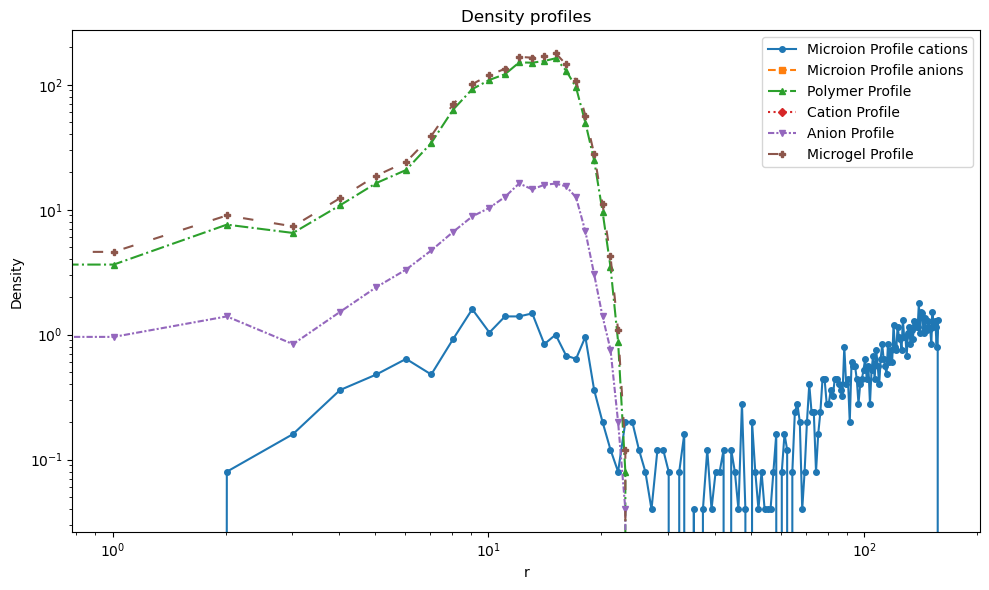

In [ ]:
#grafico density profiles

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.plot(density_dat[:, 6], density_dat[:, i], label=Density_names[i],
             linestyle=line_styles[i], marker=mark_styles[i], markersize=4)
plt.title("Density profiles")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("r")
plt.ylabel("Density")   #creo que es el numero de particulas por unidad de volumen, 
                        #normalizar
#plt.yscale("log")
#plt.xlim(0.999, 50)
plt.tight_layout()
plt.show()

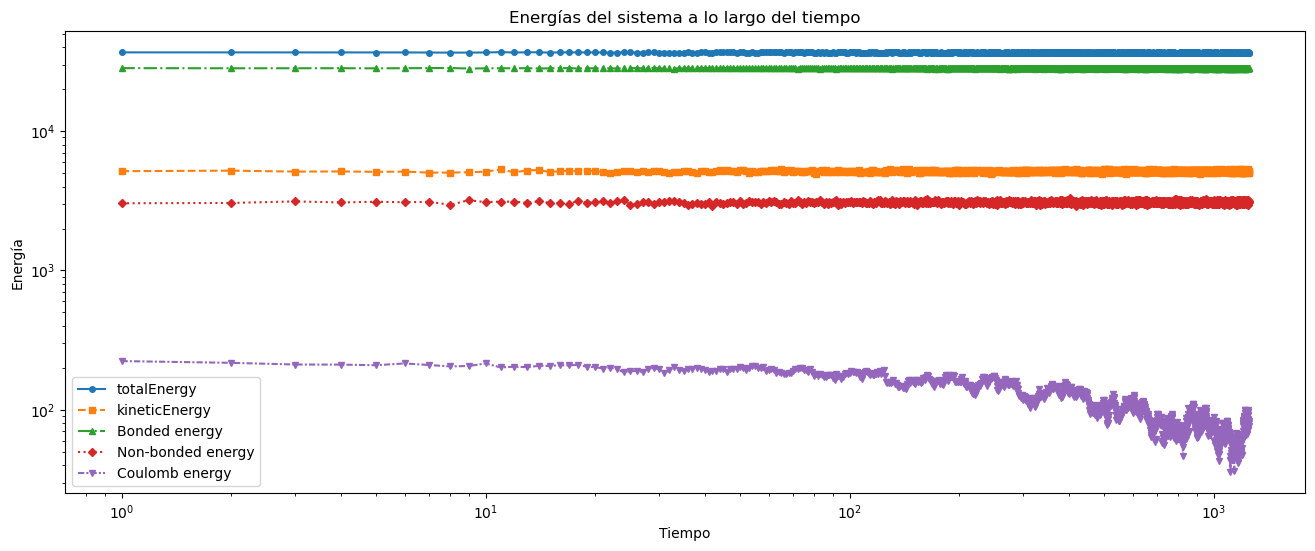

In [33]:
#grafico energias

energy_dat = load_tab_separated_data(energy_file)

plt.figure(figsize=(16, 6))
for i in range(1, 6):
    plt.plot(energy_dat[:, 0], energy_dat[:, i], label=energy_names[i], linestyle=line_styles[i-1], marker=mark_styles[i-1], markersize=4)
plt.xlabel("Tiempo")
plt.ylabel("Energía")
plt.yscale("log")
plt.xscale("log")
plt.title("Energías del sistema a lo largo del tiempo")
plt.legend()